# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.
The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

* Has life expectancy increased over time in the six nations?
* Has GDP increased over time in the six nations?
* Is there a correlation between GDP and life expectancy of a country?
* What is the average life expectancy in these nations?
* What is the distribution of that life expectancy?

# Data sources

GDP Source: World Bank national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: World Health Organization

# Import Python Modules

These are the preliminary modules that will be used in this project:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.
Here all_data.csv will be read in into a DataFrame called df, followed by a quick inspection of the DataFrame using .head() to check its contents.

In [3]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


# Cleaning Column Name

Looking over the data, there are inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long! Life expectancy at birth (years) is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. The rename function is used to change the column name to Life_expectancy.

In [5]:
df.rename(columns = {'Country': 'Country', 'Year': 'Year', 
                     'Life expectancy at birth (years)': 'Life_expectancy', 
                     'GDP':'GDP'}, inplace = True)
df.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Exploratory Plots

Exploring data through plots can sometimes be much more effective, below the distribution of GDP is being shown.
The distribution of GDP in the data is very right skewed and could be described as a power law distribution.

/Users/jd/miniconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

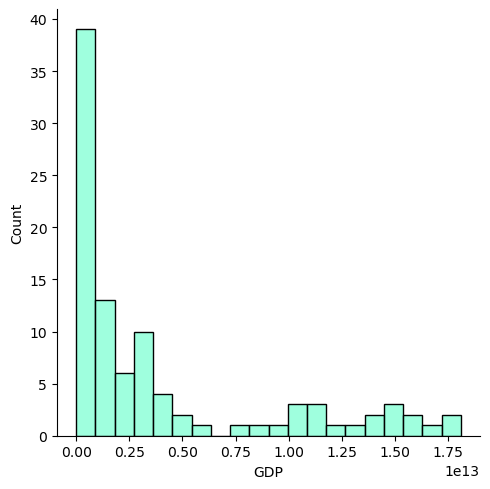

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize = (12,6))
sns.displot(df.GDP, color = 'aquamarine', bins = 20)
plt.show()
plt.clf()

Next the distribution of Life Expectancy was examined. Which we can see in the data is very left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the GDP column. A further look might also identify different modes or smaller groupings of distributions within the range.

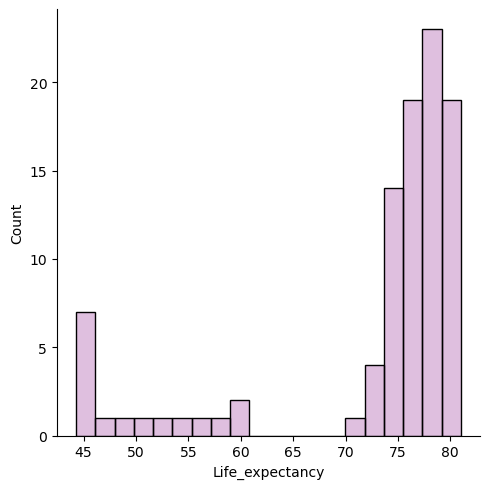

In [7]:
sns.displot(df.Life_expectancy, color = 'purple', bins = 20, alpha = 0.25)
plt.show()
plt.clf()

In [8]:
by_country = df.drop('Year', axis = 1).groupby(['Country'])
countries = list(df.Country.unique())

Now that they are broken down by Country and the average values for Life Expectancy and GDP are created, bar plots showing the mean values for each variable are created below.
The first plot is Life Expectancy and all of the countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the left skewness in the Life expectancy distribution from before

We can see as well the distribution of this data in each country in the boxplots below, we immediately notice that Zimbabwe has the higher standard deviation and the lower life expectancy mean, moreover, it is very evident that mexico has the lowest standard deviation, with most of its values for life expectancy at circa 76 years 


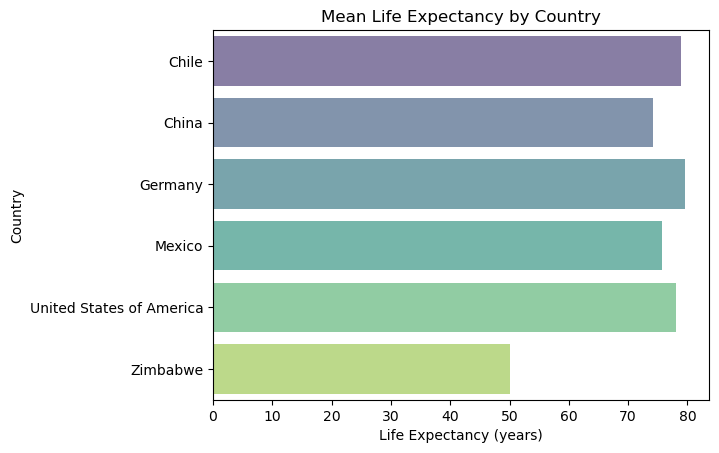

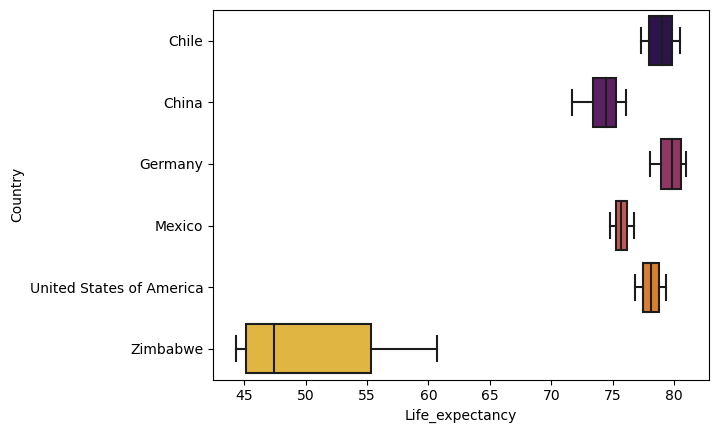

In [9]:
sns.barplot(data = by_country.mean().reset_index(), x = 'Life_expectancy', 
                    y = 'Country', palette = 'viridis', alpha = 0.66)
plt.title('Mean Life Expectancy by Country')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Country')
plt.show()
plt.clf()
sns.boxplot(data = df, x='Life_expectancy', y = 'Country', palette = 'inferno')
plt.show()
plt.clf()

For the average GDP by Country it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

In [10]:
sns.barplot(data= by_country.mean().reset_index(), y = 'Country', x = 'GDP', palette = 'plasma')

<AxesSubplot:xlabel='GDP', ylabel='Country'>

# Violin plots

Let's visualize the distributions of each and to look for patterns in the shapes.
The violin plot shows the shape of the distribution compared to the box plot. Below, country is on the y-axis and the distribution of numeric columns : GDP and Life Expectancy are on the x-axis.

In the GDP plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges.

In the Life Expectancy plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

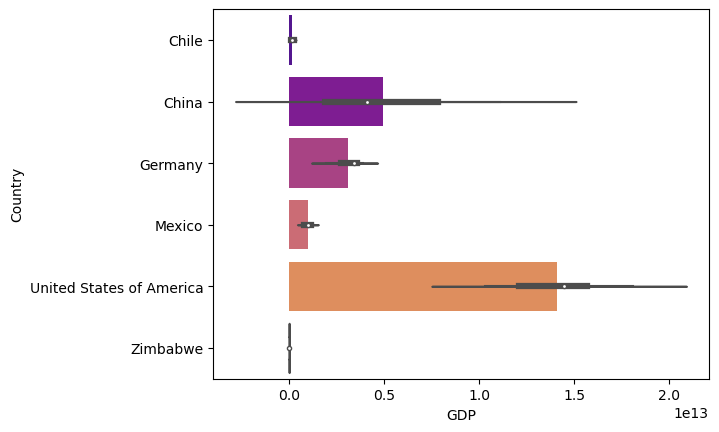

<AxesSubplot:xlabel='Life_expectancy', ylabel='Country'>

In [11]:
sns.violinplot(data = df, x = 'GDP', y = 'Country', palette = 'hsv')
plt.show()
plt.clf()
sns.violinplot(data = df, x='Life_expectancy', y = 'Country', palette = 'hsv')

Next the data will explore GDP and LEABY over the years through line charts. Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

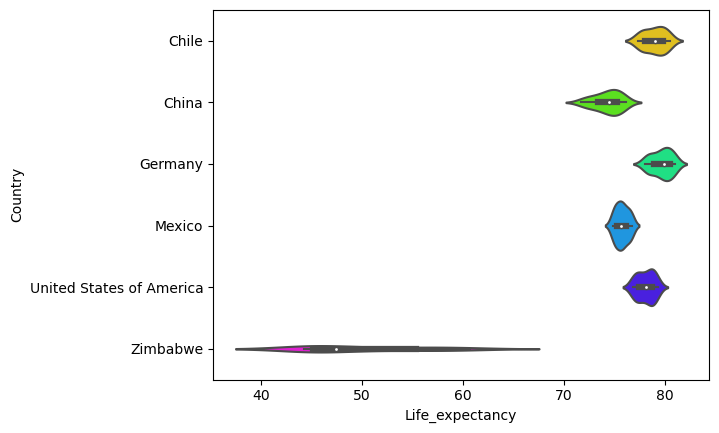

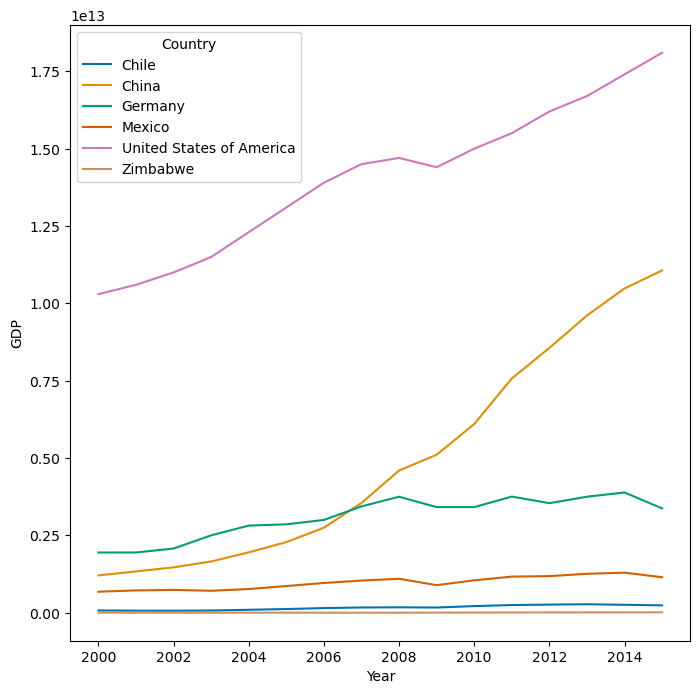

In [12]:
plt.figure(figsize = (8,8))
sns.lineplot(data =df, x = 'Year', y = 'GDP', hue = 'Country', palette = 'colorblind')
plt.show()
plt.clf()

Another aspect that was looked more into depth was the faceted line charts by Country. In the individual plots, each country has their own y axis, which makes it easier to compare the shape of their GDP over the years without the same scale. This method makes it easier to see that all of the countries have seen increases. In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000.

<Figure size 640x480 with 0 Axes>

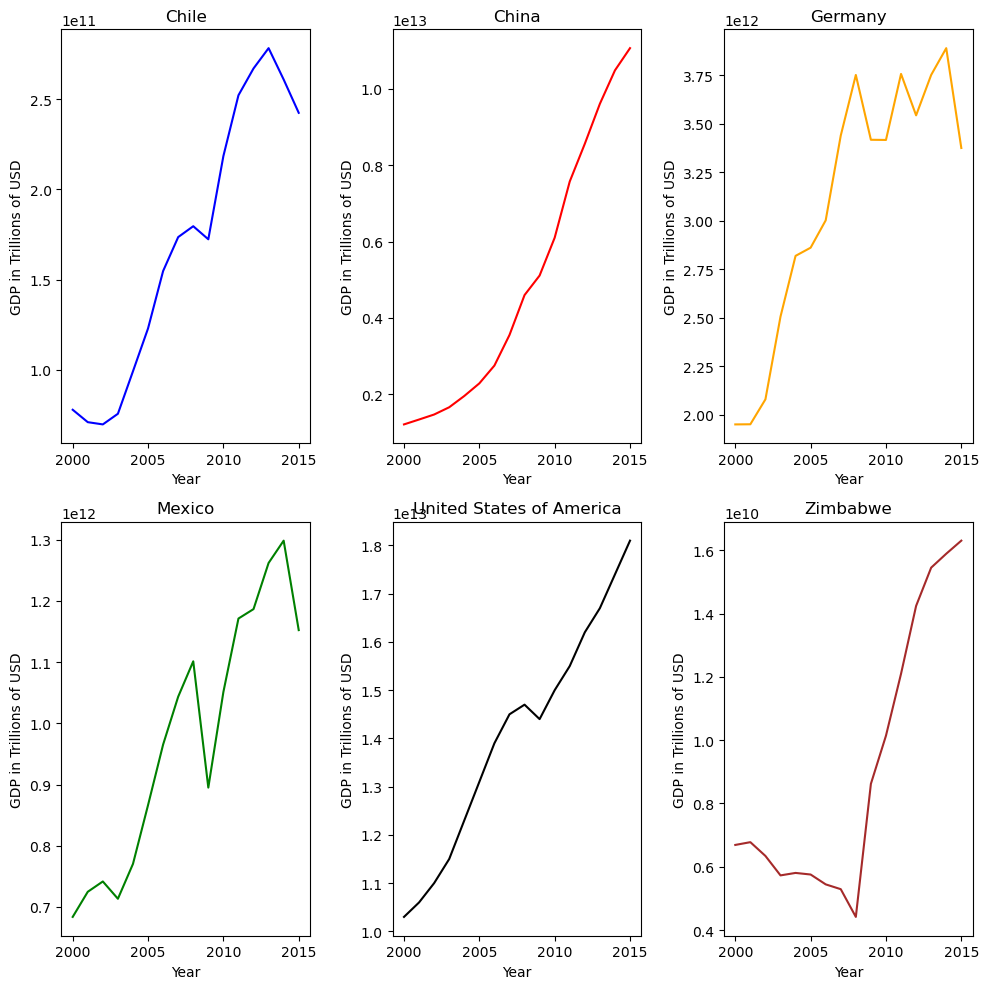

In [13]:
countries = df.Country.unique()
years = df.Year.unique()
n = 1
colors = ['blue', 'red', 'orange', 'green', 'black', 'brown']
plt.figure(figsize = (10,10), layout = 'tight')
for country in countries:
    plt.subplot(2,3,n)
    sns.lineplot(data = df, x = 'Year', 
                    y = df[df.Country == country].GDP,
                    color = colors[n-1])
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('GDP in Trillions of USD')
    n += 1
      
plt.show()
plt.clf()

The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

<Figure size 640x480 with 0 Axes>

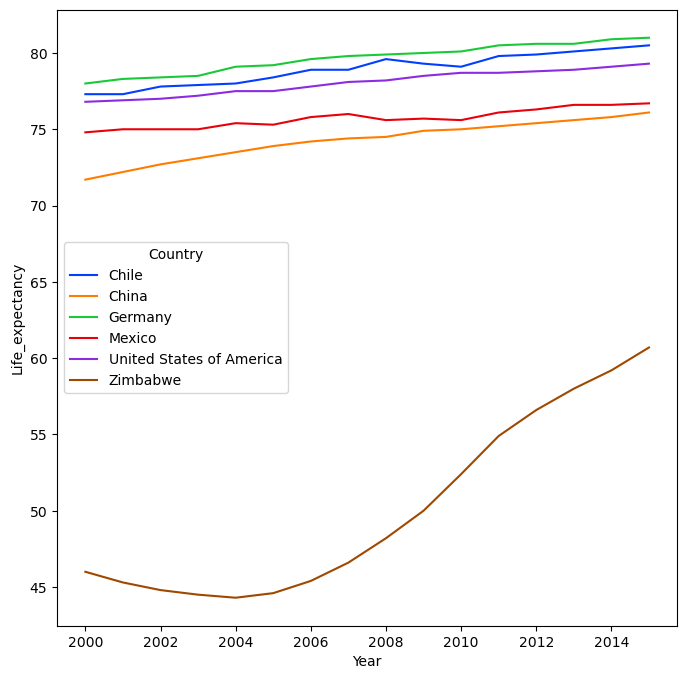

In [14]:
plt.figure(figsize = (8,8))
sns.lineplot(data =df, x = 'Year', y = 'Life_expectancy', hue = 'Country', palette = 'bright')
plt.show()
plt.clf()

Much like the break down of GDP by country before, the plot below breaks out life expectancy by country. It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries.

<Figure size 640x480 with 0 Axes>

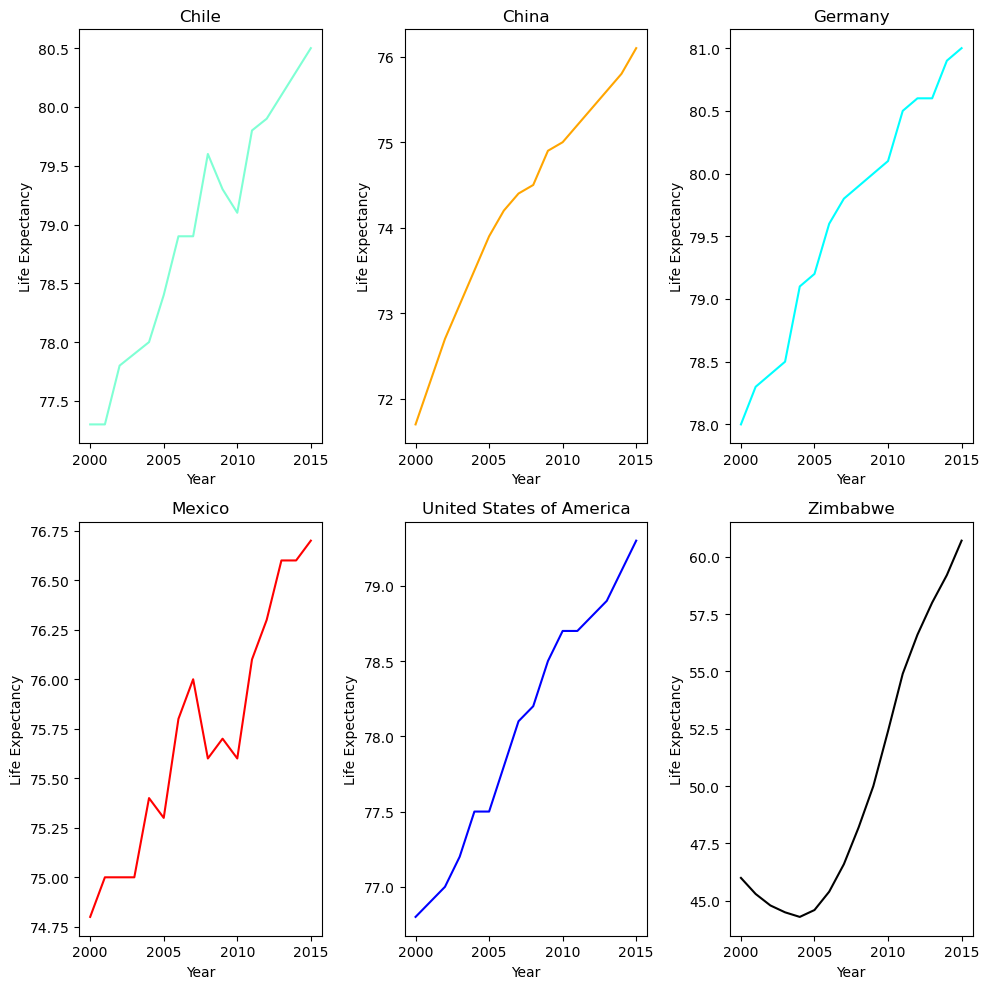

In [15]:
countries = df.Country.unique()
years = df.Year.unique()
n = 1
colors = ['aquamarine', 'orange', 'cyan', 'red', 'blue', 'black']
plt.figure(figsize = (10,10), layout = 'tight')
for country in countries:
    plt.subplot(2,3,n)
    sns.lineplot(data = df, x = 'Year', 
                    y = df[df.Country == country].Life_expectancy,
                    color = colors[n-1])
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    n += 1
      
plt.show()
plt.clf()

# Relationship Between GDP and Life Expectancy
The next two charts will explore the relationship between GDP and Life Expectancy. In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

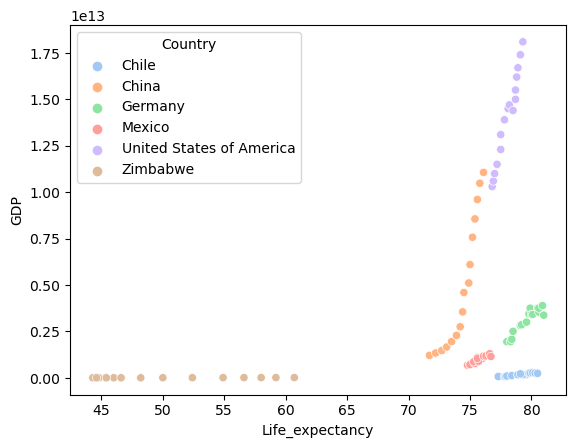

In [16]:
sns.scatterplot(data = df, x = 'Life_expectancy', y= 'GDP', hue = 'Country', palette = 'pastel')
plt.show()

Like the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

Pearson Correlation Coefficient
Chile: 0.9498766659254413
China: 0.9085255408648356
Germany: 0.932698898256127
Mexico: 0.932237716784708
United States of America: 0.9817092382430257
Zimbabwe: 0.9661998955858779
overall: 0.34320674844915605


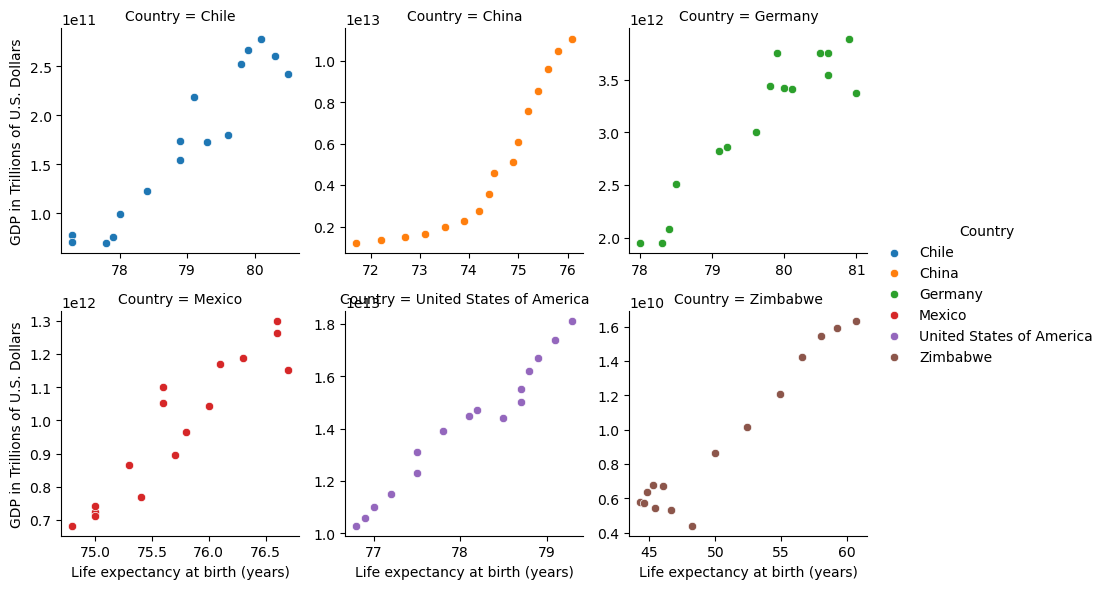

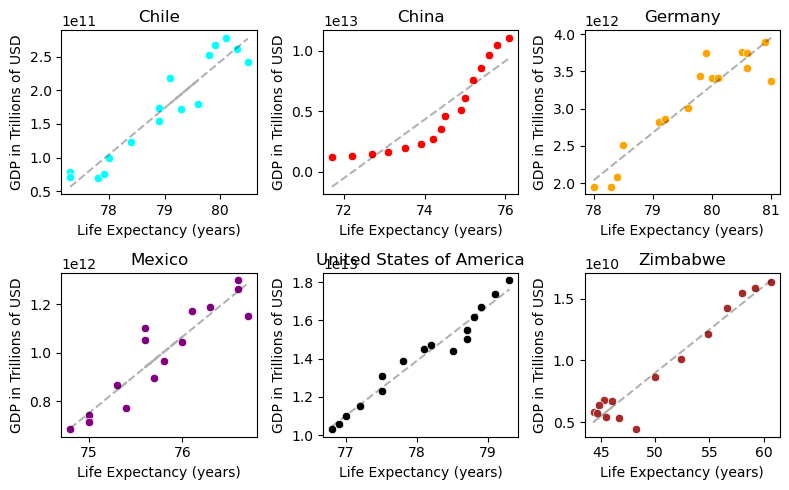

In [21]:
countries = df.Country.unique()
n = 1
colors = ['cyan', 'red', 'orange', 'purple', 'black', 'brown']
plt.figure(figsize = (8,5), layout = 'tight')
print('Pearson Correlation Coefficient')
for country in countries:
    plt.subplot(2,3,n)
    
    sns.scatterplot(data = df, x = df[df.Country == country].Life_expectancy, 
                    y = df[df.Country == country].GDP, palette = 'plasma',
                    color = colors[n-1])
    
    correlation, pvalues = stats.pearsonr(x = df[df.Country == country].Life_expectancy, 
                                          y = df[df.Country == country].GDP)
    
    model = sm.OLS.from_formula('GDP ~ Life_expectancy', data = df[df.Country == country]).fit()
    
    plt.plot(df[df.Country == country].Life_expectancy, 
             model.params[1]*df[df.Country == country].Life_expectancy + model.params[0], 
             color = 'black', alpha = 0.3, linestyle = '--')
    
    plt.title(country )
    plt.xlabel('Life Expectancy (years)')
    plt.ylabel('GDP in Trillions of USD')
    n += 1
    print(country + ': ' + str(correlation))
correlation, pvalues = stats.pearsonr(x = df.Life_expectancy, 
                                      y = df.GDP)
print('overall: ' + str(correlation))  
plt.savefig('GDP_vs_LE.png')
plt.show()
plt.clf()

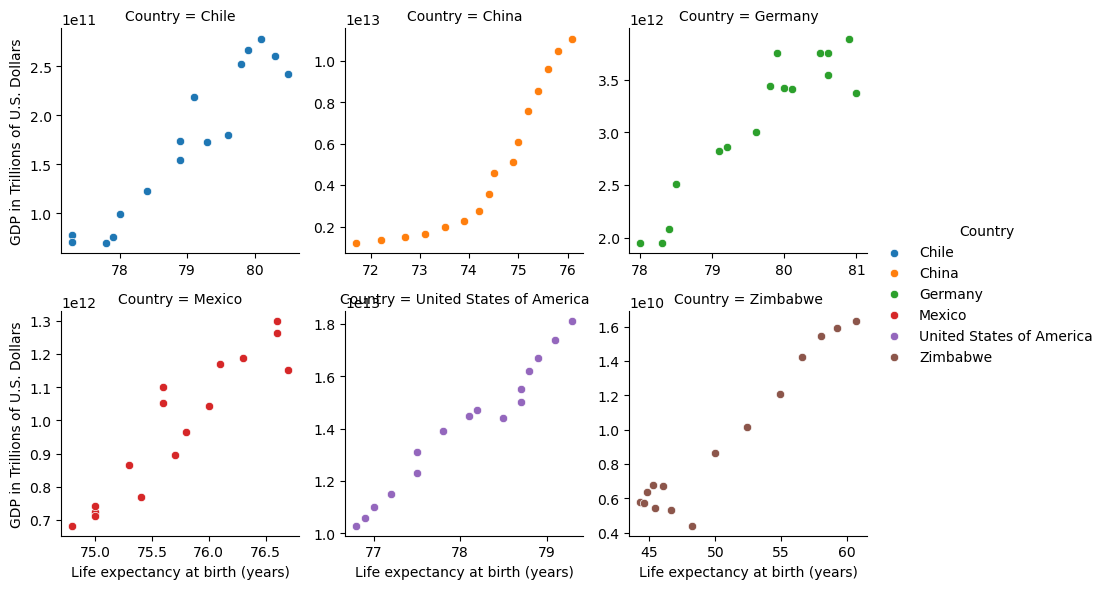

In [23]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life_expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
plt.savefig('GDPvsLE.png')
plt.show()

# Linear Regression and Pearson Correlation

We also fitted a linear regression model into the scatter plot to see how closely related are the GDP and the life expectancy in each country, we observed an undeniable postive relation between them and searched into the pearson relation to make sure, as we can see, there is a positive relation in every single one of the countries, with at least 0.9 Pearson correlation coefficient. We can then confidently say that there is a positive correlation betrwwen GDP and Life expectancy of the countries in our database.

# Conclusions:

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns.

The project was also able to answer some of the questions posed in the beginning:

* Has life expectancy increased over time in the six nations?
    Yes with Zimbabwe having the greatest increase.
* Has GDP increased over time in the six nations?
    GDP has also increased for all countries in our list, especially for China.
* Is there a correlation between GDP and life expectancy of a country?
    Yes there is a positive correlation between GDP and life expectancy for countries in our list.
* What is the average life expectancy in these nations?
    Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
* What is the distribution of that life expectancy?
    the life expectancy had a left skew, or most of the observations were on the right side.